#08 - 1 합성곱 연산에 대해 알아보자.


합성곱 신경망을 이해하려면 먼저 합성곱(convolution)연산과 교차 상관(cross-correlation) 연산에 대해 알아야 한다. 먼저 합성곱 연산에 대해 알아보자.
여기서 합성곱 연산과 교차 상관 연산을 짧게 합성곱, 교차 상관이라 부르자.

<br>

합성곱 연산은 아래와 같은 방식으로 진행된다.

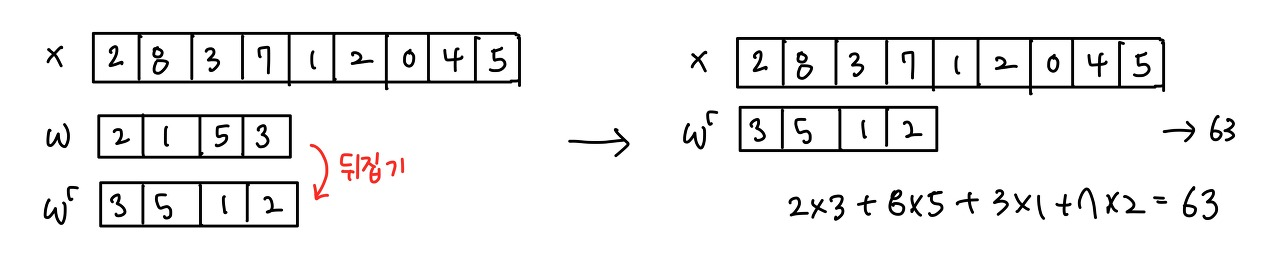

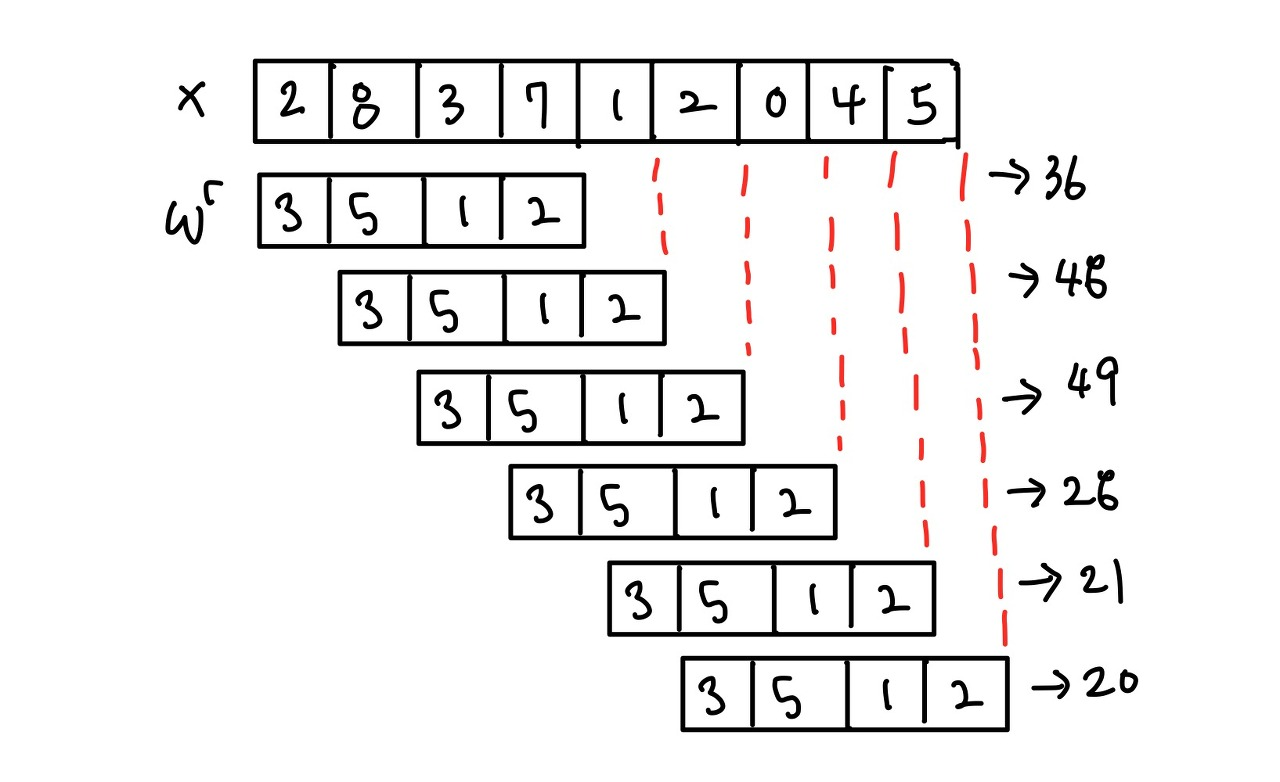

합성곱은 수식으로 x * w와 같이 표기한다. 파이썬의 곱셈 연산자와 같은 기호로 표기하지만 다른 연산을 의미하므로 혼동하지 말자.

###합성곱 구현하기

In [ ]:
#넘파이 배열을 정의하고 배열하나 선택해 뒤집기.

import numpy as np
w = np.array([2,1,5,3])
x = np.array([2,8,3,7,1,2,0,4,5])

#flip()함수 소양 배열 뒤집기
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


슬라이스 연산자를 이용해도 뒤집을 수 있다.

In [ ]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


In [ ]:
#넘파이의 점 곱으로 합성곱 수행하기
for i in range(6):
  print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [ ]:
#scipy의 convolve() 함수로 합성곱 수행
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

### 합성곱 신경망은 진짜 합성곱을 사용하지 않는다.

대부분의 딥러닝 패키지들은 합성곱 신경망을 만들 때 합성곱이 아니라 교차 상관을 사용한다.

**합성곱과 교차 상관은 아주 비슷하다**

교차 상관은 합성곱과 동일한 방법으로 연산이 진행되지만 '미끄러지는 배열을 뒤집지 않는다'는 점이 다르다. 아랴의 그림을 보자.

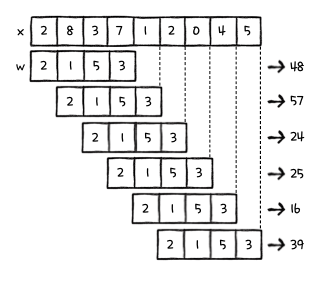

교차 상관 역시 싸이파이의 correalate() 함수를 사용하면 간단히 계산할 수 있다.

In [ ]:
from scipy.signal import correlate
correlate(x,w,mode='valid')

array([48, 57, 24, 25, 16, 39])

**합성곱 신경망에서 교차 상관을 사용하는 이유는?**

모든 모델은 훈련하기 전에 가중치 배열의 요소들을 무작위로 초기화했다. 합성곱 신경망으로 만든 모델도 마찬가지다. 가중치 배열은 무작위로 초기화되어 있다. 따라서 가중치를 뒤집어서 합성곱을 적용하던지 뒤집지않고 교차 상관을 적용하던지 상관이 없다.

### 패딩과 스트라이드를 이해하자.

패딩(padding)은 이름에서 유추할 수 있듯이 원본 배열의 양 끝에 빈 원소를 추가하는 것을 말하고, 스트라이드(stride)는 미끄러지는 배열의 간격을 조절하는 것을 말한다.

이 두 개념이 어떻게 적용되는지에 따라 밸리드 패딩, 풀 패딩, 세임 패딩이라고 부르는데 각각의 개념을 순서대로 알아보자.


**밸리드 패딩은 원본 배열의 원소가 합성곱 연산에 참여하는 정도가 다르다.**

앞에서 교차 상관을 싸이파이로 구현할 때 mode 매개변수에 'valid'를 지정했다. 바로 이것이 밸리드 패딩(valid padding)을 적용한 예이다. 밸리드 패딩은 원본 배열에 패딩을 추가하지 않고 미끄러지는 배열이 원본 배열의 끝으로 갈 때까지 교차 상관을 수행한다. 이로 인해 밸리드 패딩의 결과로 얻는 배열의 크기는 원본 배열 보다 항상 작다. 밸리드 패딩의 특징은 원본 배열의 각 원소가 연산에 참여하는 정도가 다르다는 것이다.

<br>

**풀 패딩은 원본 배열 원소의 연산 참여도를 동일하게 만든다.**

원본 배열의 원소가 연산에 동일하게 참여하려면 원본 배열의 양 끝에 가상의 원소를 추가해야 한다. 이때 가상의 원소로 0을 사용하기 때문에 이를 제로 패딩(zero padding)이라고 부른다.적절한 개수의 제로 패딩을 추가하면 원본 배열의 모든 원소가 연산에 동일하게 참여하게 만들 수 있다. 이렇게 원본 배열의 모든 요소가 동일하게 연산에 참여하는 패딩 방식을 풀 패딩(full padding)이라고 한다.

<br>

**세임 패딩은 출력 배열의 길이를 원본 배열의 길이와 동일하게 만든다.**

마지막으로 알아볼 패딩은 세임 패딩(same padding)이다. 세임 패딩은 다음 그림과 같이 출력 배열의 길이가 원본 배열의 길이와 같아지도록 원본 배열에 제로 패딩을 추가한다.

<br>

지금까지 밸리드 패딩, 풀 패딩, 세임 패딩을 알아봤다. 합성곱 신경망에서는 밸리드 패딩과 풀 패딩은 잘 사용하지 않고 세임 세임 패딩을 사용한다.

<br>

**스트라이드는 미끄러지는 간격을 조정한다.**

이제는 패딩과 함께 합성곱의 결과에 영향을 미치는 스트라이드를 알아보자. 스트라이드는 미끄러지는 배열의 간격을 이야기한다. 합성곱 신경망을 만들 때는 보통 스트라이드를 1로 지정한다.

### 2차원 배열에서 합성곱을 수행하자.

2차원 배열의 합성곱도 1차원 배열의 합성곱과 비슷하게 수행된다.

싸이파이의 correalter2d() 함수를 사용하여 2차원 배열의 합성곱을 계산해보자.

In [ ]:
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
w = np.array([[2,0], [0,0]])
from scipy.signal import correlate2d
correlate2d(x,w,mode='valid')


array([[ 2,  4],
       [ 8, 10]])

### 텐서플로로 합성곱을 수행한다.

지금부터는 합성곱 신경망을 기준으로 설명하므로 원본 배열은 입력이라 부르고 미끄러지는 배열은 가중치라고 부르자.

**합성곱 신경망의 입력은 일반적으로 4차원 배열이다.**

텐서플로에서 2차원 합성곱을 수행하는 함수는 conv2d()이다. convd() 함수는 입력으로 4차원 배열을 기대한다. 그 이유는 입력 이미지의 높이와 너비 외에 더 많은 차원이 필요하기 때문이다.

<br>

**2차원 배열을 4차원 배열로 바꿔 합성곱을 수행한다.**

앞에서 사용한 입력 x와 가중치 w를 넘파이의 reshape() 메서드로 2차원 배열에서 4차원 배열로 바꾸고 텐서플로는 실수형의 입력을 기대하므로 넘파이의 astype() 메서드로 입력의 자료형을 실수로 바꾸자. 배치와 컬러 채널은 1이다.


In [ ]:
import tensorflow as tf
x_4d = x.astype(np.float64).reshape(1,3,3,1)
w_4d = w.reshape(2,2,1,1)

c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding ='SAME')

conv2d() 함수는 결괏값으로 텐서플로의 Tensor 객체를 반환한다. 텐서플레에서는 다차원 배열을 텐서(tensor)라고 부른다. Tensor 객체의 numpy() 메서드를 사용하면 텐서를 넘파이 배열로 변환할 수 있다. 배치 차원과 컬러 차원을 제거하고 편의상(3,3) 크기로 변환하여 출력하자.

In [ ]:
c_out.numpy().reshape(3,3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

2차원 배열로 실습했던 correlate2d()의 출력 결과와 같지만 실제 텐서플로의 conv2d() 함수에 전달되는 매개변수의 값은 4차원 배열이다.

그리고 여기서는 합성곱의 가중치를 필터 또는 커널이라고 부르자.

# 08-2 풀링 연산에 대해 알아보자.

합성곱 신경망에서는 특별히 합성곱이 일어나는 층을 합성곱층, 풀링이 일어나는 층을 풀링 층이라고 부른다. 합성곱층과 풀링층에서 만드어진 결과를 특성 맵(feature map) 이라고 부른다

여기서 풀링이란 특성 맵을 스캔하며 최댓값을 고르거나 평균값을 계산하는 것을 말한다.

합성곱 신경망에서는 최대 풀링과 평균 풀링을 주로 사용한다. 이 두 가지 풀링 방식에 대해 알아보자.

### 최대 풀링에 대해 알아보자

앞에서 풀링으로 최댓값을 고르거나 평균값을 계산하는 방법을 살펴보았다. 이때 최갯값을 고르는 방식을 최대 풀링(max pooling)이라고 한다. 최대 풀링은 특성 맵 위를 스캔하며 최댓값을 고른다. 풀링 영역의 크기는 보통 2 x 2를 지정한다. 일반적으로 스트라이드는 풀링의 한 모서리 크기로 지정한다. 즉, 스트라이드는 2를 지정하여 풀링 영역이 겹쳐지지 않도록 스캔한다. 2 x 2 풀링은 특성 맵의 크기를 절반으로 줄인다.(면적은 1/4)

### 평균 풀링에 대해 알아보자

평균 풀링(average pooling)은 풀링 영역의 평균값을 계산한다.

그렇다면 최대 풀링과 평균 풀링 중 어떤 방법이 더 유용할까?

연구자들은 보통 평균 풀링보다 최대 풀링을 선호한다.

평균 풀링은 합성곱층을 통과하는 특징들을 희석시킬 가능성이 높기 때문이다. 즉, 입려게서 합성곱 필터가 찾고자 하는 부분은 특성 맵의 가장 큰 값으로 활성화되는데 평균 풀링은 가장 큰 특성의 값을 상쇄시키기 때문이다. 하지만 최대 풀링은 가장 큰 특징을 유지시키는 성질 있으므로 이미지 분류 작업에 잘 맞는다.



# 08 - 3 합성곱 신경망의 구조를 알아보자

이제 마지막으로 합성곱 신경망에서 자주 사용하는 활성화 함수인 렐루(ReLU) 함수에 대해 알아보자.

### 렐루 함수에 대해 알아보자

이전까지는 은닉층에 시그모이드 함수를 활성화 함수로 사용했다.
렐루 함수는 주로 합성곱층에 적용되는 활성화 함수로, 합성곱 신경망의 성능을 더 높여준다. 렐루 함수는 0보다 큰 값은 그대로 통과시키고 0보다 작은 값은 0으로 만든다.

### 렐루 함수 구현하기

렐루 함수는 넘파이의 maximum() 함수를 사용하면 간단하게 구현할 수 있다.

In [ ]:
def relu(x):
  return np.maximum(x, 0)

In [ ]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

### 렐루 함수의 도함수를 알아보자.

그러면 렐루 함수의 도함수는 어떻게 구할까? 렐루 함수의 도함수는 입력이 0보다 크면 1이고 입력이 0보다 작으면 0이다.

미적분 지식이 있다면, 'x=0 알때 그래프가 크게 꺾이므로 x=0일 때의 도함수는 없다' 라고 생각할 것이다. 사실이다. 렐루 함수 같은 그래프는 x = 0에서 연속적이지 않으므로 기울기가 정의되지 않는다. 하지만 대부분의 딥러닝 패키지들은 x = 0인 경우 도함수를 0으로 생각한다. 이렇게 해도 실전에서 잘 작동하기 때문이다.

### 합성곱 신경망에서 일어나는 일들과 구조를 알아보자.

**합성곱 신경망에 주입될 입력 데이터에는 채널이 있다**

합성곱 신경망은 이미지의 2차원 형태를 입력으로 그대로 사용하므로 이미지를 한 줄로 펼칠 필요가 없다. 이런 특성 덕분에 이미지 정보가 손상되지 않는다는 장점이 있다. 한 가지 고려할 점은 이미지는 채널(channel)이라는 차원을 하나 더 가진다.
채널이란 이미지의 픽셀이 가진 색상을 표현하기 위해 필요한 정보를 말한다.

<br>

**합성곱층에서 일어나는 일을 알아보자**

이미지의 모든 채널에 합성곱이 한 번에 적용되어야 하므로 커널의 마지막 차원은 입력 채널의 개수와 동일해야 한다. 이미지와 커널이 준비되었으니 이제 합성곱을 수행한다. 합성곱이 완료되면 다음 층에서 사용하게 될 특성 맵이 만들어진다. 입력 채널은 커널의 채널과 각각 합성곱을 수행한다. 그런 다음 합성곱의 전체 결과를 더하여 특성 맵을 1조각 만든다. 만먁 이미지의 여러 특징을 감지하려면커널을 여러 개 사용해야 한다.

<br>

**풀링층에서 일어나는 일을 알아보자**

합성곱층을 통해 특성 맵이 만들어졌다. 이 특성 맵에 활성화 함수로 렐루 함수를 적용하고 풀링을 적용한다. 특성 맵에 렐루 함수가 적용된 후에 풀링이 적용된다. 풀링은 특성 맵의 크기를 줄여주므로 특성 맵의 크기가 2 x 2 x 5일 때 2 x 2 풀링이 적용되면 1 x 1 x 5 크기의 특성 맵이 만들어진다. 물론 채널의 크기는 줄어드지 않는다.

<br>

**특성 맵을 펼쳐 완전 연결 신경망에 주입한다.**

합성곱층과 풀링층을 통과시켜 얻은 특성 맵은 어떤 과정을 거칠까? 일반적으로 합성곱층과 풀링층을 통과시켜 얻은 특성 맵은 일렬로 펼쳐 완전 연결층에 입력으로 주입한다. 완전 연결층은 한 신경망 안에 여러 개가 들어 있을 수도 있다. 완전 연결층의 출력은 출력층의 뉴런과 연결된다. 이 층들은 합성곱층이 찾은 특성을 사용하여 최종 분류 단계를 수행하는 과정으로 볼 수 있다.

<br>

이제 전형적인 합성곱 신경망을 완벽하게 이해했을 것이다. 해로운 개념이 많이 나왔지만 실제로 합성곱과 풀링은 conv2d()와 max_pool2d() 함수를 사용하여 손쉽게 구현할 수 있으므로 합성곱 신경망의 구현은 어렵지 않다.

#08-4 합성곱 신경망을 만들고 훈련하자.

이제 합성곱 신경망을 만들어보자. 합성곱 신경망은 지금까지는 순수 파이썬으로 신경망을 구현해 왔지만 합성곱 신경망은 그렇게 하기 힘들다. 그래서 텐서플로가 제공하는 합성곱 함수와 자동 미분 기능을 사용하여 합성곱 신경망을 구현해보자.


### 합성곱 신경망의 전체 구조를 한 번 더 살펴보자.

여기서 구현하게 될 합성곱 신경망의 전체 구조는 다음과 같다.

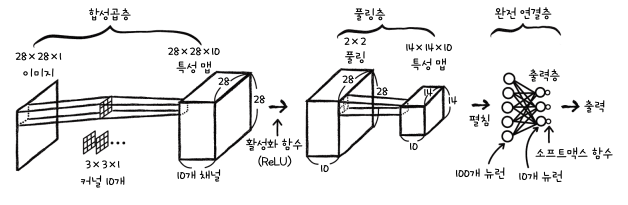

28  x 28 크기의 흑백 이미지와 3 x 3 크기의 커널 10개로 합성곱을 수행한다. 그런 다음 2 x 2 크기의 최대 풀링을 수행하여 14 x 14 x 10로 특성 맵의 크기를 줄인다. 이 특성 맵을 일렬로 펼쳐서 100개의 뉴런을 가진 완전 연결층과 연결시킬 것입니다.
그런 다음 10개의 클래스를 구분하기 위한 소프트맥스 함수를 연결한다.

### 합성곱 신경망의 정방향 계산 구현하기

이번에 구현할 합성곱 신경망 클래스는 ConvolutionNetwork 이다. 이 클래스의 코드 구성은 이전에 구현한 클래스들과 대체로 비슷하다. 다만 합성곱과 렐루 함수 그리고 풀링이 적용된다는 점만 다르다. 먼저 합성곱과 풀링이 일어나는 정방향 계산 부분을 담당하는 forpass() 메서드를 구현해보자.

In [ ]:
# 1. 합성곱 적용하기

def forpass(self, x):
  # 3 X 3 합성곱 연산을 수행하자.
  c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding = 'SAME') + self.conv_b

합성곱을 수행하는 conv2d() 함수에 전달한 매개변수 값은 다음과 같다.

1. self.conv_w : 합성곱에 사용할 가중치
2. stride, padding



In [ ]:
# 2. relu함수 적용하기

def forpass(self, x):
  ...
  #렐루 함수를 적용하자.
  r_out = tf.nn.relu(c_out)
  ...

In [ ]:
# 3. 풀링 적용하고 완전 연결층 수정하기

def forpass(self,x):
  ...
  # 2 X 2 최대 풀링을 적용한다.
  p_out = tf.nn.max_pool2d(r_out, ksize = 2, strides = 2, padding = 'VALID')
  # 첫 번째 배치 자원을 제외하고 출력을 일렬로 펼친다.
  f_out = tf.reshape(p_out, [x,shape[0,] -1])
  z1 = tf.matmul(f_out, self.w1) + self.b1    # 첫 번째 층의 선형식을 계산한다.
  a1 = tf.nn.relu(z1)                         # 활성화 함수를 적용한다.
  z2 = tf.matmul(a1, self.w2) + self.b2       # 두 번째 층의 선형식을 계산한다.
  return z2

위에서 np.dot() 함수를 텐서플로의 tf.matmul() 함수로 바꾸었다. 이는 conv2d()와 max_pool2d() 등이 Tensor 객체를 반환하기 때문이다. 완전 연결층의 활성화 함수도 시그모이드 함수 대신 렐루 함수를 사용했다.

### 합성곱 신경망의 역방향 계산 구현하기

앞에서도 말했듯이 합성곱의 역방향 계산을 직접 구현하는 것은 복잡하기도 하지만 학숩에 유용하지도 않다. 여기에서는 그레이디언트를 구하기 위해 역방향 계산을 직접 구현하는 대신 텐서플로의 자동 미분 (automatic differentiation) 기능을 사용하자. 역방향 계산을 구현하기 전에 자동 미분 기능을 간단히 알아보자.

**자동 미분의 사용 방법을 알아보자.**

텐서플로와 같은 딥러닝 패키지들은 사용자가 작성한 연산을 계산 그래프로 만들어 자동 미분 기능을 구현한다.

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
  y = x ** 3 + 2 * x + 5

#그레이디언트를 계산하자.
print(tape.gradient(y,x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [ ]:
# 1. 역방향 계산 구현하기

def training(self,x,y):
  m = len(x)
  with tf.GradientTape() as tape:
    z = self.forpass(x)
    #손실을 계산
    loss = tf.nn.softmax_cross_entropy_with_logits(y,z)
    loss = tf.reduce_mead(loss)
  ...

training() 메서드에서 forpass() 메서드를 호출하여 정방향 계산을 수행한 다음 tf.nn.softmax_cross_entropy_with_logits() 함수를 호출하여 정방향 계산의 결과(z)와 타깃(y)을 기반으로 손실값을 계산한다. 이렇게 하면 크로스 엔트로피 손실과 그레이디언트 계산을 올바르게 처리해 주므로 편리하다. 이때 softmax_cross_entropy_with_logits() 함수는 각 배치의 각 샘플에 대한 손실을 반환하므로 reduce_mean() 함수로 평균을 계산한다.

In [ ]:
# 2. 그레이디언트 계산하기

def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))

tape.gradient() 메서드를 사용하면 그레이디언트를 자동으로 계산이 가능하다.
그다음에 optimizer.apply_gradients() 메서드가 등장한다. 텐서플로는 여러 종류의 경사하강법 알고리즘을 클래스로 미리 구현해 놓았다. 경사 하강법 알고리즘을 바꾸어 가며 테스트할 때 가중치를 업데이트하는 코드를 일일이 고쳐야 한다면 아주 번거로울 것이다. 텐서플로의 옵티마이저를 사용하면 간단하게 알고리즘을 바꾸어 테스트할 수 있다. apply_gradient() 메서드에는 그레이디언트와 가충치를 튜플로 묶은 리스트를 전달해야한다.

### 옵티마이저 객체를 만들어 가중치 초기화

training() 메서드에 등장하는 self.optimizer를 fit() 메서드에서 만들어보자. 여기서는 SGD를 사용

1. fit 메서드 수정하기

In [ ]:
def fit(self, x, y, epochs=100, x_val=None, y_val=None):
  self.init_weights(x.shape, y.shape[1])               #은닉층과 출력층의 가중치를 초기화
  self.optimizer = tf.optimizers.SGD(learning_rate = self.lr)
  #epochs만큼 반복
  for i in range(epochs):
    print('에포크', i, end=' ')
    # 제너레이터 함수에서 반환한 미니 배치를 순환
    batch_losses = []
    for x_batch, y_batch in self.gen_batch(x,y):
      print('.', end='')
      self.training(x_batch, y_batch)
      #배치손실을 기록
      batch_losses.append(self.get_loss(x_batch, y_batch))
      print()
      # 배치 손실 평균 내어 손실값으로 저장
      self.losses.append(np.mean(batch_losses))
      # 검증 세트에 대한 손실을 계산
      self.val_losses.append(self.get_loss(x_val, y_val))

2. init_weights() 메서드 수정하기

가중치를 초기화하는 init_weights() 메서드는 큰 변화가 있다. 바로 가중치를 glorot_uniform() 함수로 초기화한다는 점이다. 텐서플로의 자동 미분 기능을 사용하기 위해 가중치를 tf.Variable() 함수로 만들어야 한다는 점이다. 합성곱의 가중치와 완전 연결층의 가중치를 tf.Variable() 함수로 선언할 때 입력값에 따라 자료형이 자동으로 결정된다. np.zeros() 함수는 기본적으로 64비트 실수를 만든다. 따라서 절편 변수를 가중치 변수와 동일하게 32비트 실수로 맞추기 위해 dtype 매개변수에 float을 지정했다.

In [ ]:
def init_weights(self, input_shape, n_classes):
  g = tf.initializers.glorot_uniform()
  self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
  self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype = float)

###glorot_uniform()를 알아보자

init_weights() 메서드의 첫 번째 줄에 있는 glorot_uniform() 함수는 가중치를 초기화할때 글로럿(Glorot)초기화라는 방법을 사용할 수 있게 해준다. 지금까지 넘파이로 난수를 만들어 가중치를 초기화했다. 신경망 모델이 너무 커지면 손실 함수도 복잡해지기 때문에 출발점에 따라 결과가 달라질 수 있다. 가중치를 적절하게 초기화하지 않으면 출발점이 적절하지 않은 곳에 설정하므로 엉뚱한 곳에서 최적점이라는 판단을 내릴 수도 있다. 이렇게 찾은 지점을 지역 최적점(local minimum)이라고 부른다. 가중치를 적절하게 초기화했다면 출발점이 적절한 곳에 설정되므로 올바른 최적점을 찾게 된다. 이렇게 찾은 지점을 전역 최적점(global minimum)이라고 부른다.

**글로럿 초기화 방식으로 가중치를 초기화**

글로럿 초기화 방식은 세이비어 글로럿(Xavier Glorot)이 제안하여 널리 사용되는 가중치 초기화 방식이다. 텐서플로의 glorot_uniform() 함수는

$- \sqrt{\frac{6}{입력 뉴런 수 + 출력 뉴런 수}}$ 와 $\sqrt{\frac{6}{입력 뉴런 수 + 출력 뉴런 수}}$ 사이에서 균등하게 난수를 발생시켜 가중치를 초기화한다.

이제 중요한 구현을 모두 마쳤다. predict()메서드는 정방향 계산으로 얻은 출력값인 Tensor 객체를 넘파이 배열로 바꾼다. 검증 손실은 softmax_cross_entropy_with_logits() 함수를 사용하는 get_loss() 함수로 계산한다.

In [ ]:
# 전체 코드
import tensorflow as tf

class ConvolutionNetwork:

    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))

    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.

    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

### 합성곱 신경망 훈련하기

In [ ]:
# 1. 데이터 세트 불러오기

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 2. 훈련 데이터 세트를 훈련 세트와 검증 세트로 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify = y_train_all, test_size = 0.2,
                                                  random_state = 42)

In [ ]:
# 3. 타깃을 원-핫 인코딩으로 변환하기
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [ ]:
# 4. 입력 데이터 준비하기
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)

(48000, 28, 28, 1)


In [ ]:
# 5. 입력 데이터 표준화 전처리하기
x_train = x_train / 255
x_val = x_val / 255

In [ ]:
import numpy as np

# 6. 모델 훈련하기
cn = ConvolutionNetwork(n_kernels = 10, units=100, batch_size = 128, learning_rate = 0.01)
cn.fit(x_train, y_train_encoded, x_val = x_val, y_val = y_val_encoded, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


에포크 0 .

......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 .............................................................................................................................................................................................................................................

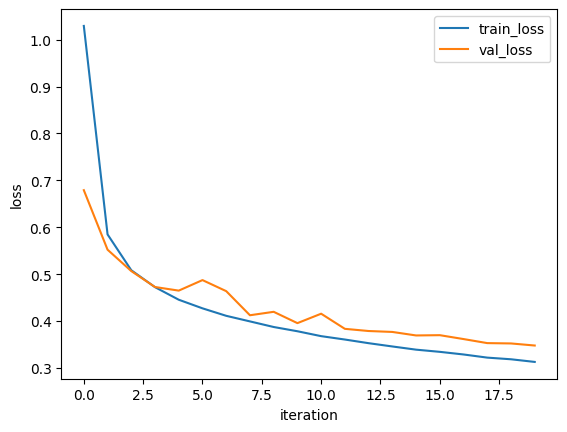

In [ ]:
# 7. 훈련, 검증 손실 그래프 그리고 검증 세트의 정확도 확인하기

import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

에포크가 진행되면서 훈련 손실과 검증 손실이 ㅊ조금씩 차이가 나긴 하지만 전반적으로 훈련이 잘 되고 있다. 이 모델의 검증 세트에 대한 정확도를 보자.

In [ ]:
cn.score(x_val, y_val_encoded)

0.87975

# 08 - 5 케라스로 합성곱 신경망을 만들자


### 케라스로 합성곱 신경망 만들기

케라스의 합성곱 층은 Conv2D 클래스이다. 최대 풀링은 MaxPooling2D 클래스를 사용하고, 특성 맵을 일렬로 펼칠 때는 Flatten 클래스를 사용한다.

In [ ]:
# 1. 필요한 클래스들을 임포트

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# 2. 합성곱층 쌓기

conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [ ]:
# 3. 풀링층 쌓기

conv1.add(MaxPooling2D((2,2)))

In [ ]:
# 4. 완전 연결층에 주입할 수 있도록 특성 맵 펼치기
conv1.add(Flatten())

In [ ]:
# 5. 완전 연결층 쌓기
conv1.add(Dense(100, activation = 'relu'))
conv1.add(Dense(10, activation = 'softmax'))

In [ ]:
# 6. 모델 구조 살펴보기
conv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 10)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197210 (770.35 KB)
Trainable params: 197210 (770.35 KB)
Non-trainable params: 0 (0.00 Byte)
________________

### 합성곱 신경망 모델 훈련하기

In [ ]:
# 1. 모델 컴파일
conv1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 2. 아담 옵티마이저 사용하기
history = conv1.fit(x_train, y_train_encoded, epochs = 20, validation_data =  (x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0345 - accuracy: 0.9880 - val_loss: 0.4449 - val_accuracy: 0.9103
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9888 - val_loss: 0.4169 - val_accuracy: 0.9214
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0293 - accuracy: 0.9901 - val_loss: 0.4416 - val_accuracy: 0.9134
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0278 - accuracy: 0.9902 - val_loss: 0.4535 - val_accuracy: 0.9191
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.4589 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.4779 - val_accuracy: 0.9185
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.5110 - val_accuracy:

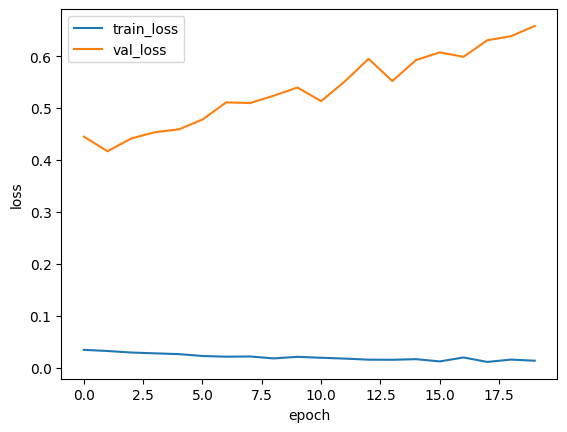

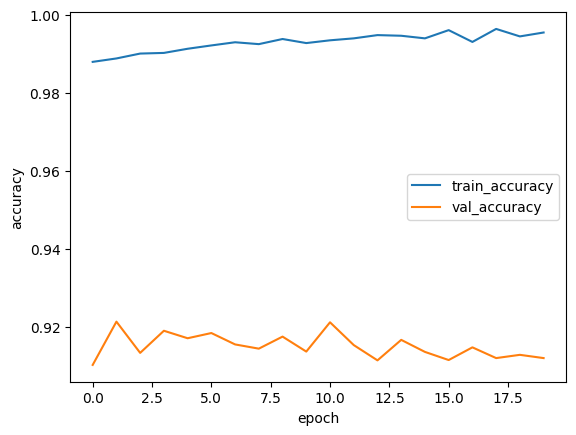

In [ ]:
# 3. 손실 그래프와 정확도 그래프 확인하기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

정확도가 크게 증가했다. 하지만 몇 번의 에포크 만에 검증 손실이 크게 증가했다. 이는 과대적합이 일찍 발생했다는 것을 의미한다. 과대적합을 해결하려면 어떻게 해야할까?

### 드롭아웃을 알아보자

드롭아웃은 무작위로 일부 뉴런을 비활성화시킨다. 무작위로 일부 뉴런을 비활성화시키면 특정 뉴런에 과도하게 의존하여 훈련하는 것을 막아준다.

드롭아웃은 모델을 훈련시킬 때만 적용하는 기법이므로 테스트나 실전에는 적용하지 않는다. 이로 인해 상대적으로 테스트와 실전의 출력값이 훈련할 때의 출력값보다 높아지므로 테스트나 실전에서는 출력값을 드롭아웃 비율만큼 낮춰야 한다.

**텐서플로에서는 드롭아웃의 비율만큼 뉴런의 출력을 높인다**

### 드롭아웃을 적용해 합성곱 신경망을 구현한다.


In [ ]:
# 1. 케라스로 만든 합성곱 신경망에 드롭아웃 적용하기

from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3,3), activation = 'relu', padding='same', input_shape = (28,28,1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation = 'relu'))
conv2.add(Dense(10, activation = 'softmax'))

In [ ]:
# 2. 드롭아웃층 확인하기
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1960)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               196100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
# 3. 훈련하기

conv2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics=['accuracy'])
...
history = conv2.fit(x_train, y_train_encoded, epochs=20,
                    validation_data = (x_val, y_val_encoded))
...

Epoch 1/20
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5081 - accuracy: 0.8185 - val_loss: 0.3598 - val_accuracy: 0.8710
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3774 - accuracy: 0.8631 - val_loss: 0.3173 - val_accuracy: 0.8843
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3419 - accuracy: 0.8753 - val_loss: 0.2881 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3125 - accuracy: 0.8839 - val_loss: 0.2763 - val_accuracy: 0.9003
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2934 - accuracy: 0.8906 - val_loss: 0.2673 - val_accuracy: 0.9025
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2789 - accuracy: 0.8969 - val_loss: 0.2569 - val_accuracy: 0.9054
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2633 - accuracy: 0.9019 - val_loss: 0.2592 - val_accuracy:

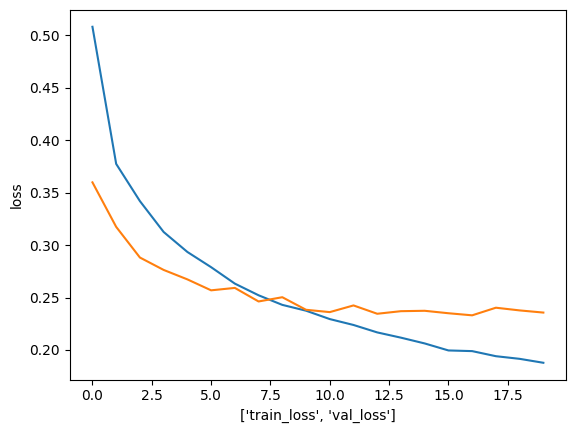

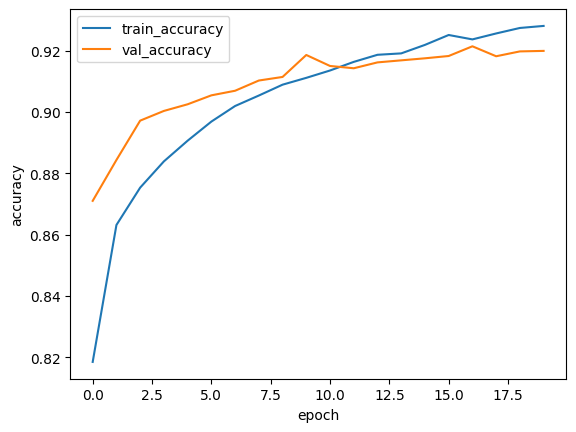

In [ ]:
# 4. 손실 그래프와 정확도 그래프 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

그레프를 보면 검증 손실이 증가되는 에포크가 확실히 더 늦춰졌고 훈련 손실과의 차이도 좁혀졌다. 정확도는 미세하게 증가되었다. 분류 문제에서 정확도를 직접 최적화할 수 없다. 대신 크로스 엔트로피 손실 함수를 대신 최적화한다. 손실 함수를 최소화하면 정확도가 높아질 것으로 기대할 수 있지만 반드시 그렇지는 않다.